In [739]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [740]:
data = pd.read_csv('surfaces.csv')

In [741]:
data.head()

,Equation,a,b,c,fx,fy,fxx,fyy,fxy,D,Result
0,a*x**2 + b*y**2,-16,32,0,-32*x,64*y,-32,64,0,-2048.0,Saddle Point
1,a*x**2 + b*y**2,-8,9,0,-16*x,18*y,-16,18,0,-288.0,Saddle Point
2,a*x**2 + b*y**2,-34,-17,0,-68*x,-34*y,-68,-34,0,2312.0,Maximum
3,a*x**2 + b*y**2,10,-37,0,20*x,-74*y,20,-74,0,-1480.0,Saddle Point
4,a*x**2 + b*y**2,-29,21,0,-58*x,42*y,-58,42,0,-2436.0,Saddle Point


In [742]:
data.tail()

,Equation,a,b,c,fx,fy,fxx,fyy,fxy,D,Result
895,a*cos(x) + b*sin(y),34,-36,10,-34*sin(x),-36*cos(y),34,-36,0,-1224.0,Saddle Point
896,a*cos(x) + b*sin(y),32,29,-28,-32*sin(x),29*cos(y),-32,-29,0,928.0,Maximum
897,a*cos(x) + b*sin(y),32,29,-28,-32*sin(x),29*cos(y),-32,29,0,-928.0,Saddle Point
898,a*cos(x) + b*sin(y),32,29,-28,-32*sin(x),29*cos(y),32,-29,0,-928.0,Saddle Point
899,a*cos(x) + b*sin(y),32,29,-28,-32*sin(x),29*cos(y),32,29,0,928.0,Minimum


In [743]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Equation  900 non-null    object 
 1   a         900 non-null    int64  
 2   b         900 non-null    int64  
 3   c         900 non-null    int64  
 4   fx        900 non-null    object 
 5   fy        900 non-null    object 
 6   fxx       900 non-null    int64  
 7   fyy       900 non-null    int64  
 8   fxy       900 non-null    int64  
 9   D         900 non-null    float64
 10  Result    900 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 77.5+ KB


In [744]:
data.isnull().sum()

Equation    0
a           0
b           0
c           0
fx          0
fy          0
fxx         0
fyy         0
fxy         0
D           0
Result      0
dtype: int64

In [745]:
data.describe()

,a,b,c,fxx,fyy,fxy,D
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-1.048889,0.317778,3.284444,1.100000,1.582222,0.306667,120.264444
std,28.378771,30.464829,26.960548,42.381904,51.826000,8.465159,2447.814474
min,-50.000000,-50.000000,-50.000000,-100.000000,-100.000000,-50.000000,-9024.000000
25%,-25.000000,-28.000000,-17.000000,-28.000000,-37.250000,0.000000,-768.250000
50%,-1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
75%,24.000000,28.000000,26.000000,29.250000,41.250000,0.000000,977.250000
max,50.000000,50.000000,50.000000,100.000000,100.000000,50.000000,10000.000000


In [746]:
df = data.copy()

In [747]:
df = df.drop(['a', 'b', 'c', 'fx', 'fy'], axis=1)

In [748]:
df.head()

,Equation,fxx,fyy,fxy,D,Result
0,a*x**2 + b*y**2,-32,64,0,-2048.0,Saddle Point
1,a*x**2 + b*y**2,-16,18,0,-288.0,Saddle Point
2,a*x**2 + b*y**2,-68,-34,0,2312.0,Maximum
3,a*x**2 + b*y**2,20,-74,0,-1480.0,Saddle Point
4,a*x**2 + b*y**2,-58,42,0,-2436.0,Saddle Point


In [749]:
df['Equation'].value_counts()

Equation
a*cos(x) + b*sin(y)                    300
a*sin(x) + b*y**2                      150
a*x**2 + b*y**2                         75
a*x**2 + b*y**2 + c*x*y                 75
a*x**4 + b*y**2                         75
a*log(x**2 + 1) + b*y**2                75
a*exp(-x**2 - y**2)                     75
(a*x**2 + b*y**2)/(x**2 + y**2 + 1)     75
Name: count, dtype: int64

In [750]:
count = df['Equation'].value_counts().min()
df = (df.groupby('Equation', group_keys=False).apply(lambda x: x.sample(n=count, random_state=42)).reset_index(drop=True))

In [751]:
df['Equation'].value_counts()

Equation
(a*x**2 + b*y**2)/(x**2 + y**2 + 1)    75
a*cos(x) + b*sin(y)                    75
a*exp(-x**2 - y**2)                    75
a*log(x**2 + 1) + b*y**2               75
a*sin(x) + b*y**2                      75
a*x**2 + b*y**2                        75
a*x**2 + b*y**2 + c*x*y                75
a*x**4 + b*y**2                        75
Name: count, dtype: int64

In [752]:
df['Result'].value_counts()

Result
Saddle Point    232
Minimum         159
Maximum         132
Inconclusive     77
Name: count, dtype: int64

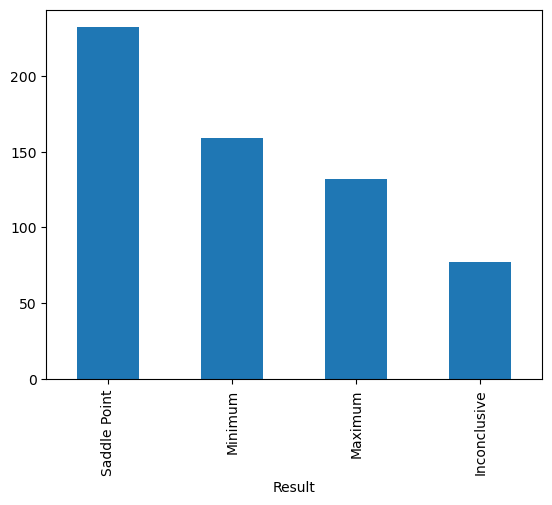

In [753]:
df['Result'].value_counts().plot(kind='bar')
plt.show()

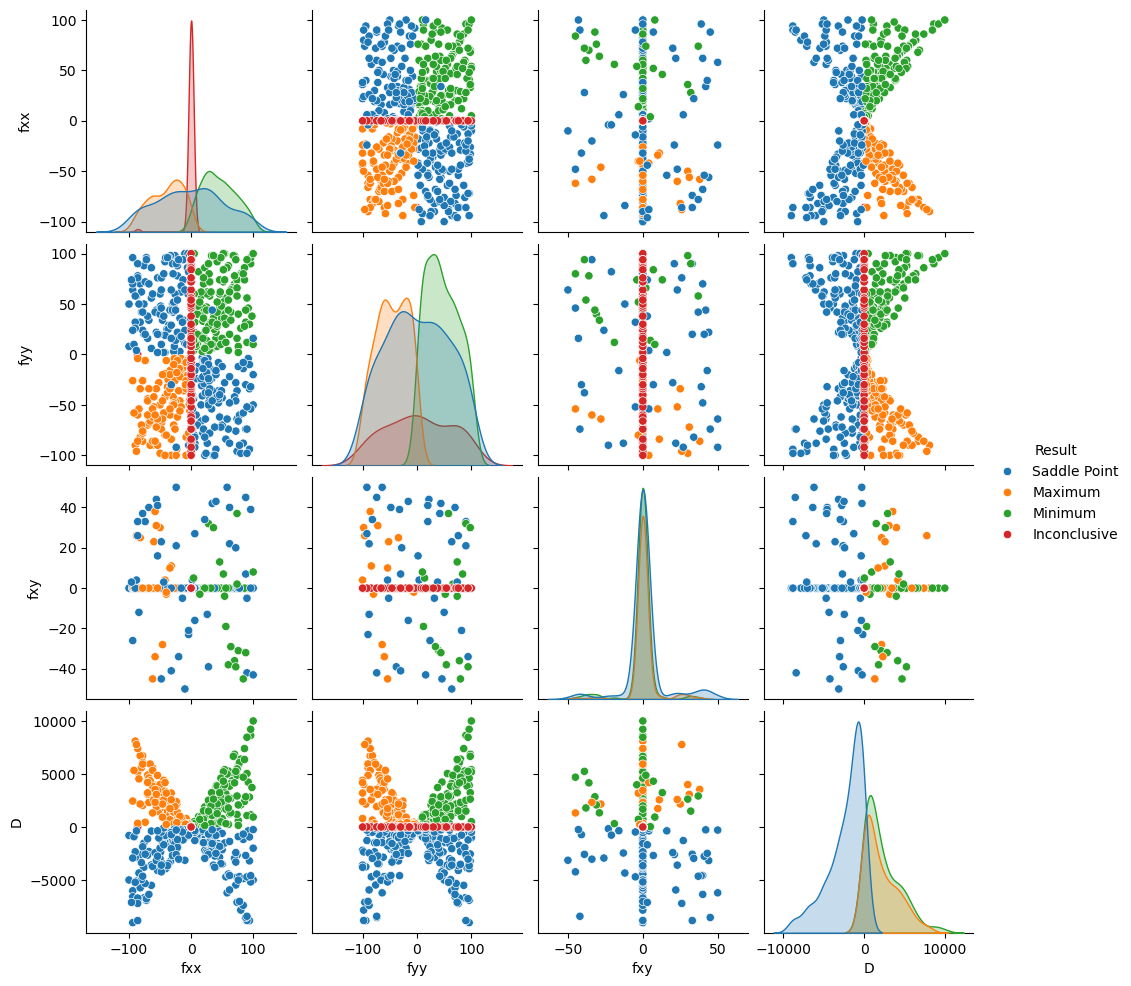

In [754]:
sns.pairplot(df, hue='Result', vars=['fxx', 'fyy', 'fxy', 'D'])
plt.show()

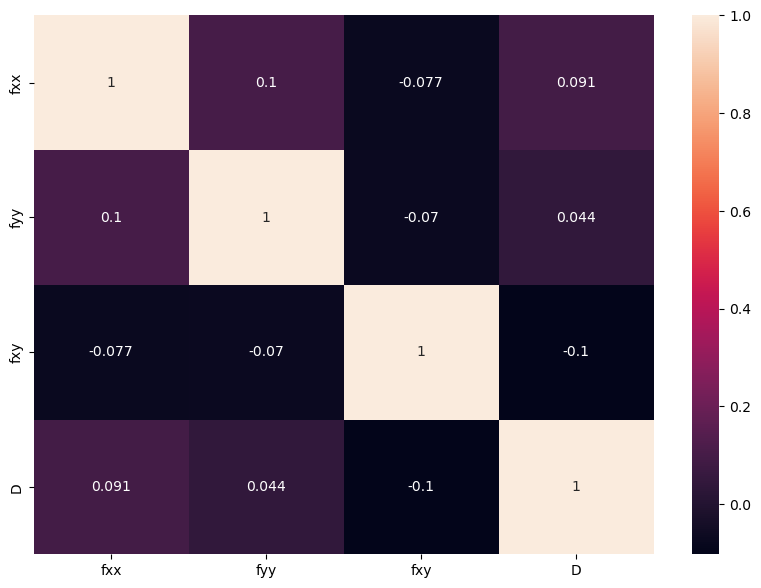

In [755]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[['fxx', 'fyy', 'fxy', 'D']].corr(), annot=True)
plt.show()

In [756]:
df['Equation'].unique()

array(['(a*x**2 + b*y**2)/(x**2 + y**2 + 1)', 'a*cos(x) + b*sin(y)',
       'a*exp(-x**2 - y**2)', 'a*log(x**2 + 1) + b*y**2',
       'a*sin(x) + b*y**2', 'a*x**2 + b*y**2', 'a*x**2 + b*y**2 + c*x*y',
       'a*x**4 + b*y**2'], dtype=object)

In [757]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['Equation']]).toarray()

In [758]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [759]:
encoded_df

,Equation_(a*x**2 + b*y**2)/(x**2 + y**2 + 1),Equation_a*cos(x) + b*sin(y),Equation_a*exp(-x**2 - y**2),Equation_a*log(x**2 + 1) + b*y**2,Equation_a*sin(x) + b*y**2,Equation_a*x**2 + b*y**2,Equation_a*x**2 + b*y**2 + c*x*y,Equation_a*x**4 + b*y**2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [760]:
df = pd.concat([df.drop(columns=['Equation']).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [761]:
df['Result'] = df['Result'].map({'Inconclusive': 0, 'Saddle Point': 1, 'Minimum': 2, 'Maximum': 3}).astype(int)

In [762]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   fxx                                           600 non-null    int64  
 1   fyy                                           600 non-null    int64  
 2   fxy                                           600 non-null    int64  
 3   D                                             600 non-null    float64
 4   Result                                        600 non-null    int64  
 5   Equation_(a*x**2 + b*y**2)/(x**2 + y**2 + 1)  600 non-null    float64
 6   Equation_a*cos(x) + b*sin(y)                  600 non-null    float64
 7   Equation_a*exp(-x**2 - y**2)                  600 non-null    float64
 8   Equation_a*log(x**2 + 1) + b*y**2             600 non-null    float64
 9   Equation_a*sin(x) + b*y**2                    600 non-null    flo

In [763]:
df.to_csv('clean_surfaces.csv')